### 資料轉換

- positive skew 正偏態或右偏態通常會作log轉換消除偏態(Gaussian-like)  
- negative skew 負偏態或左偏態通常會作exp指數轉換消除偏態(Gaussian-like)  
- Min-max scaling 使資料所有features都linearly scale到[-1,1]或[0,1]
- Standardize  使資料所有features都scale到~N(0,1)  
- Robust scaling 因為有outlier使linearly scale到[-1,1]或[0,1]時導致資料偏移, 這時會用四分位數中第一分位數跟第三分位數距離來除避免outlier值太大  
- Thresholding 通常需要專家領域的人來說明  

- 如果沒有所有features都scale到[-1,1]或[0,1],KNN計算距離會受特定維度影響  
  For KNN, scaling prevents the distance scores being dominated by a few features
- 如果沒有所有features都scale到[-1,1]或[0,1], 作Gradient Decent往極值移動時會受特定維度影響  
  For linear regression, logistic regression, SVM, scaling helps the optimization  
- For decision trees and random forest, scaling or not is not important

In [13]:
import numpy as np
import scipy
n = 100
a_b = [i*scipy.rand() for i in range(n)]
a_b.sort()
# len(a_b[:int(n*.8)])
c = a_b[int(n*.8)]
print(a_b)

[0.0, 0.25115274658869124, 0.3824438126055387, 0.4085520442453886, 0.7625901379378001, 0.8047167589611331, 1.3259270521337874, 1.341442628904938, 1.354353059404155, 1.5443225853298896, 1.6799453934506445, 1.9016130824552724, 2.3066274167775127, 2.490213260543257, 2.7731684351859514, 3.078364665194891, 3.477329474882181, 3.4917624204107702, 3.5718301126867624, 3.684626509880891, 3.866209229701016, 3.9092472296474052, 4.090949433653032, 4.765004023614007, 4.933214301994779, 5.516271212355512, 6.063568812158037, 6.486272548996289, 6.836078619464321, 7.013191443913938, 7.080974229079244, 7.150357511404322, 7.875213948917581, 8.44962396569321, 8.829886177599953, 9.022214470378806, 9.660231297439141, 9.6905878090841, 11.237045202452741, 12.897716577308211, 14.227587019191427, 14.462523171032785, 14.474111774812204, 14.486179990439613, 15.414778465647512, 17.85160432397279, 18.133059153764663, 19.208859017222725, 19.86903699368488, 20.23666703518492, 21.391625686337118, 21.56622388977875, 21.

### Imbalanced classification 
- Under-sample the majority class  
- Over-sample the minority class  

### Selecting Hyper-parameters  
將資料切成training data跟testing data  
將training data切成k fold個validation data  
假設k為5, 則拿4份當作training data, 1份當作validation data  
拿training data先用不同的Hyper-parameters參數$\lambda$訓練, 再用validation data檢驗  
取不同份validation data 重複k次計算validation data檢驗的誤差平均  
就可以得出最合適的Hyper-parameters參數$\lambda$  
再用這組Hyper-parameters參數$\lambda$重新訓練training data加上validation data的資料  
得到的模型來預測testing data  

**選擇要比較的$\lambda$的方法** 
- grid search  
- random search(效果較佳)  
- Bayesian optimization  
 - Pick strategy: tradeoff between  
   1. Exploration  
   Hyper-parameters for which the outcome is most uncertain  
   2. Exploitation  
   Hyper-parameters which are expected to have a good outcome  
   
 
   

### Multi-class classification  
- one-vs.-rest  
Target Label = {Red,Green,Blue}  
$f_1$: Red or "Not Red"  
$f_2$: Green or "Not Green"  
$f_3$: Blue or "Not Blue"  
$\hat y=arg~max_{k{\in\lbrace1,2,3\rbrace}}f_k(x_i)$
- one-vs.-one  
假設有k類, 訓練C(k,2)個分類器  
預測時同時將資料餵給C(k,2)個分類器,大多數說該類別+1即預測該類別    

### Bias vs Variance  
- Bias通常來自對model的估計偏差, 比如指數型估計成線性型, model太小無法涵蓋真實問題  
- Variance通常來自訓練資料集的不均勻, 相對母體來說偏向某一部分, training data太小無法涵蓋整個母體  


### Model complexity vs Error  
- 針對high bias, low varance我們會先固定訓練資料集且增加model複雜度, 這時prediction error會下降  
  當bias變小(model複雜度足夠), varance變大, 這時prediction error會不降反升  
- high varance我們會嘗試增加data 

### Data Size vs Model complexity  
1. training data分得好嗎? 分得不好增加model複雜度, 分得好跳到2  
2. training data分好後, 看testing data分得好嗎? 分得不好增加training data size再回到1 

# Cross Validation with KFold  
```python
from sklearn.model_selection import KFold
```

In [31]:
import numpy as np
from sklearn.model_selection import KFold
#5筆維度2的資料
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([1, 2, 3, 4, 5])
# n_splits不能大於資料size
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for train_data_index, validation_data_index in kf.split(X):
    print("train_data_index: "+str(train_data_index)+", validation_data_index: "+ str(validation_data_index))
    X_train, X_validation = X[train_data_index], X[validation_data_index]
    y_train, y_validation = y[train_data_index], y[validation_data_index]

i =1
for train_data_index, validation_data_index in kf.split(X):
    X_train, X_validation = X[train_data_index], X[validation_data_index]
    y_train, y_validation = y[train_data_index], y[validation_data_index]
    print('Cross Validation%d=============='%i,'\n' 
          "TRAIN data:",'\n', X_train,'\n'
          ,"Validation data:", X_validation)
    i+=1

train_data_index: [1 2 3 4], validation_data_index: [0]
train_data_index: [0 2 3 4], validation_data_index: [1]
train_data_index: [0 1 3 4], validation_data_index: [2]
train_data_index: [0 1 2 4], validation_data_index: [3]
train_data_index: [0 1 2 3], validation_data_index: [4]
Cross Validation1============== 
TRAIN data: 
 [[ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]] 
 Validation data: [[1 2]]
Cross Validation2============== 
TRAIN data: 
 [[ 1  2]
 [ 5  6]
 [ 7  8]
 [ 9 10]] 
 Validation data: [[3 4]]
Cross Validation3============== 
TRAIN data: 
 [[ 1  2]
 [ 3  4]
 [ 7  8]
 [ 9 10]] 
 Validation data: [[5 6]]
Cross Validation4============== 
TRAIN data: 
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 9 10]] 
 Validation data: [[7 8]]
Cross Validation5============== 
TRAIN data: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 
 Validation data: [[ 9 10]]


# SVM with KFold  

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

### Generate Sin(X)

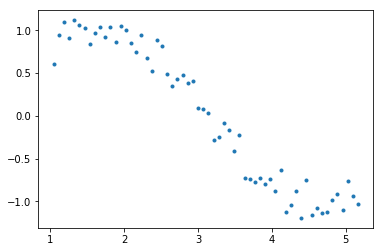

In [2]:
# define input array with angles from 60deg to 300deg converted to radians
X = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(100)  #Setting seed for reproducability
y = np.sin(X) + np.random.normal(0,0.15,len(X))
X = X.reshape(60,-1)
y = y.reshape(60,-1)
data = pd.DataFrame(np.column_stack([X,y]),columns=['X','y'])
plt.plot(data['X'],data['y'],'.')
plt.show()

In [7]:
def draw_svm_regression(X, y, flag_dict, kernel, C = 1):
    for key in flag_dict:
        plotflag = key
        params = flag_dict[key]
        kernel_dict={'linear': SVR(kernel='linear',C=params),
                     'poly': SVR(kernel='poly',C=1,degree=params),
                     'rbf': SVR(kernel='rbf',C=1,gamma=params),
                }
        mae=None
        if kernel in kernel_dict:
            model = kernel_dict[kernel]
            model.fit(X,y.reshape(-1))
            predition = model.predict(X)
            mae = mean_absolute_error(y_pred=predition, y_true=y)
        plt.subplot(plotflag)
        plt.tight_layout()
        plt.plot(X,y,'.',c='b')
        plt.plot(X,predition,'.',c='r')
        if kernel == 'linear':
            plt.title('Plot for C: %.2f'%params + '\n' + 'mae:%.2f'%mae)
        elif kernel == 'poly':
            plt.title('Plot for degree: %.2f'%params + '\n' + 'mae:%.2f'%mae)
        elif kernel == 'rbf':
            plt.title('Plot for gamma: %.2f'%params + '\n' + 'mae:%.2f'%mae)   

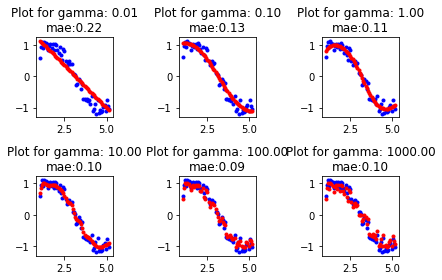

In [8]:
flag_dict = {231:0.01,232:0.1,233:1,
             234:10,235:100,236:1000,
            }
draw_svm_regression(X,y,flag_dict,'rbf')
plt.show()

### 利用5-folds Cross Validation算不同gamma的MAE

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
def cross_validation(X, y, folds, gamma):
    # k fold
    kf = KFold(n_splits=folds, random_state=None, shuffle=False)
    evaluation = []
    for train_index, validation_index in kf.split(X):
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y[train_index], y[validation_index]
        model = SVR(kernel='rbf', C=1, gamma=gamma)
        model.fit(X_train, y_train.reshape(-1))
        predicted = model.predict(X_validation)
        mae = mean_absolute_error(y_pred=predicted, y_true=y_validation)
        evaluation.append(mae)
    return evaluation

folds = 5
cv = pd.DataFrame()
for gamma in np.logspace(-2, 3, 6).tolist(): #generate gamma from 1e-2~1e3
    cv['Gamma_'+str(gamma)] = cross_validation(X, y, folds, gamma)
cv

,Gamma_0.01,Gamma_0.1,Gamma_1.0,Gamma_10.0,Gamma_100.0,Gamma_1000.0
0,0.240295,0.228815,0.319926,0.983344,1.162192,1.203920
1,0.397592,0.159306,0.124477,0.509821,0.853879,0.965878
2,0.147584,0.136731,0.137241,0.215059,0.245586,0.261242
3,0.461221,0.241619,0.140147,0.478019,0.832765,0.983377
4,0.349623,0.242203,0.368836,0.985230,1.190064,1.260761


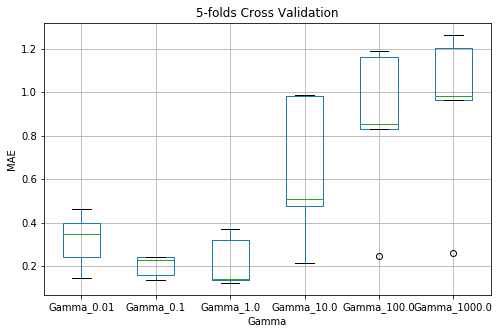

In [18]:
plt.title('5-folds Cross Validation')
plt.xlabel('Gamma')
plt.ylabel('MAE')
cv.boxplot()
plt.show()

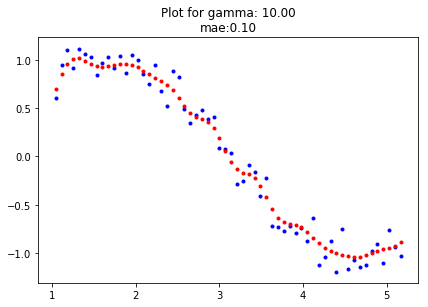

In [12]:
flag_dict = {111:10}
draw_svm_regression(X,y,flag_dict,'rbf')
plt.show()

### Grid Search for SVM Parameters
```python
from sklearn.model_selection import GridSearchCV
```

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 5
data = datasets.load_iris()
X = data.data
y= data.target


In [14]:
from sklearn.model_selection import GridSearchCV
# parameters放要搜尋的字典, 會改變model的參數
parameters= {'kernel':['linear', 'rbf'], 'C':[0.01,0.1,1,10], 'gamma':[0.01,0.1,1,10]}
model = svm.SVC()
model.fit(X, y.reshape(-1))
best_model = GridSearchCV(model, parameters, cv=5, scoring='accuracy', return_train_score='cv_results_')
best_model.fit(X, y)

NameError: name 'svm' is not defined

In [16]:
print('accuracy before Grid Search CV:%.4f'%model.score(X, y))
print('accuracy after Grid Search CV:%.4f'%best_model.score(X,y))
best_model.best_estimator_


accuracy before Grid Search CV:0.9867
accuracy after Grid Search CV:0.9933


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
best_model.cv_results_

{'mean_fit_time': array([0.00136752, 0.00243611, 0.00172291, 0.00165458, 0.00106392,
        0.0015852 , 0.00080428, 0.00162215, 0.00084276, 0.00282369,
        0.00086684, 0.00122256, 0.00051064, 0.00087585, 0.00044203,
        0.00108953, 0.00044065, 0.00068493, 0.00055966, 0.00065484,
        0.0005897 , 0.00090661, 0.00110388, 0.0016398 , 0.00042038,
        0.0006681 , 0.00050168, 0.00064359, 0.00032725, 0.00069356,
        0.00033045, 0.00126114]),
 'std_fit_time': array([3.96143454e-04, 5.85237737e-04, 1.67171067e-03, 4.00920855e-04,
        1.23260386e-04, 2.95804016e-04, 7.58696620e-05, 1.71388197e-04,
        1.65888858e-04, 1.09388428e-03, 1.78552717e-04, 5.94002871e-04,
        3.55342557e-05, 1.12568781e-04, 3.87545715e-05, 8.07255031e-05,
        3.39491313e-05, 3.90571259e-05, 1.29110967e-04, 1.38930301e-04,
        7.56310333e-05, 6.95410392e-05, 7.44285969e-04, 1.94585869e-04,
        5.72680037e-05, 1.71392508e-04, 6.49175571e-05, 1.80326335e-04,
        1.96602684e-0